# Regression Case Study: Old car price prediction

Problem Statement: Predict the price of a second hand car based on its features
* Target Variable: price
* Predictor Variables: Age of car, Fuel Type, Kms driven etc.

### Exploring the data

In [2]:
# Reading the dataset
import pandas as pd
import numpy as np
CarPricesData=pd.read_csv('CarPricesData.csv', encoding='latin')
print('Shape before deleting duplicate values:', CarPricesData.shape)

# Removing duplicate rows if any
CarPricesData=CarPricesData.drop_duplicates()
print('Shape After deleting duplicate values:', CarPricesData.shape)

CarPricesData.head()
# Start observing the Quantitative/Categorical/Qualitative variables

Shape before deleting duplicate values: (1436, 10)
Shape After deleting duplicate values: (1435, 10)


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [3]:
# Looking at the number of rows and columns
CarPricesData.shape

(1435, 10)

In [4]:
# Observing the summarized information of data
# Data types, Missing values etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
CarPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
Price        1435 non-null int64
Age          1433 non-null float64
KM           1435 non-null int64
FuelType     1431 non-null object
HP           1435 non-null int64
MetColor     1435 non-null int64
Automatic    1435 non-null int64
CC           1433 non-null float64
Doors        1435 non-null int64
Weight       1433 non-null float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [5]:
# Looking at the statistial distribution of the data
# Observe that the min values of Age and KM column is an outlier
CarPricesData.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1431,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10720.915679,56.020237,68571.782578,NaN,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,NaN,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


### Observe the distribution of target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure there is no Zeros in the target variable, as it will cause divide by Zero exeption later on for accuracy calculation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f626ed0>]],
      dtype=object)

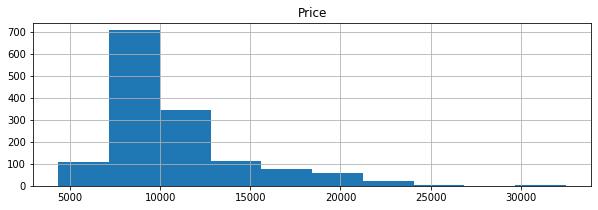

In [6]:
%matplotlib inline
CarPricesData.hist(['Price'], figsize=[10,3])
# Observe the outlier Prices

In [7]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
CarPricesData.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

### Visualize distribution of all the categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

In [8]:
CarPricesData.groupby('FuelType').size()

FuelType
CNG         17
Diesel     154
Petrol    1260
dtype: int64

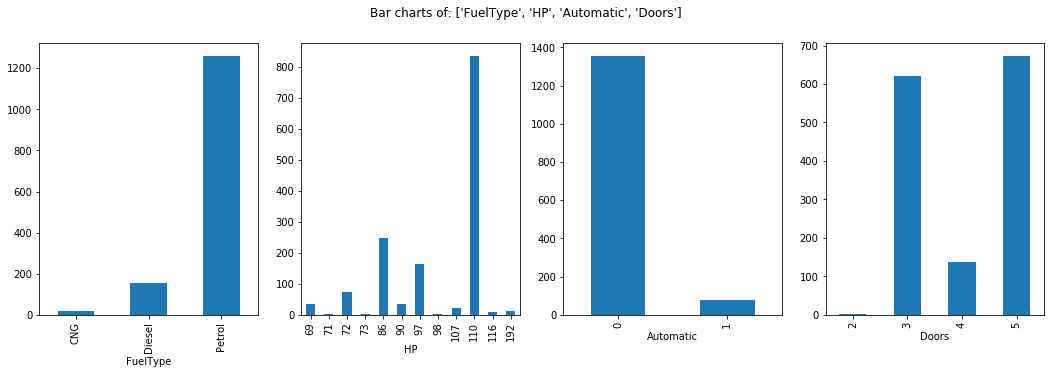

In [9]:
# Plotting multiple bar charts for categorical variables
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(18,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Calling the function
PlotBarCharts(inpData=CarPricesData, colsToPlot=['FuelType', 'HP','Automatic','Doors'])

### Visualize distribution of all the numeric Predictor variables in the data using histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12025d790>,
      dtype=object)

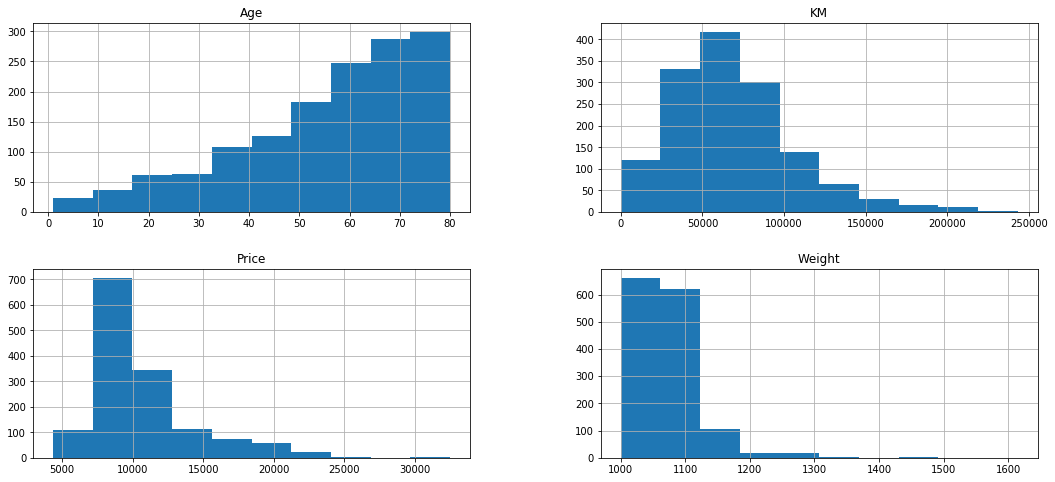

In [10]:
# Plotting histograms of multiple columns together
CarPricesData.hist(['Price','Age', 'KM', 'Weight'], figsize=(18,8))

## Visual Exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Continuous Vs Categorical---- Bar Plot, Box Plot
* Categorical Vs Categorical---- Bar Plot

### Relationship exploration: Continuous Vs Continuous
When the target variable is continuous and the predictor variable is also continuous we analyze the relation using scatter plot and measure the strength of relation using correlation

#### Generating graphs for all numeric columns in data
* This gives a birds eye view about the numeric variables which looks correlated with Target Variable "Price"
* Do not run scatter_matrix() command for more than 10 variables at a time for performance issues

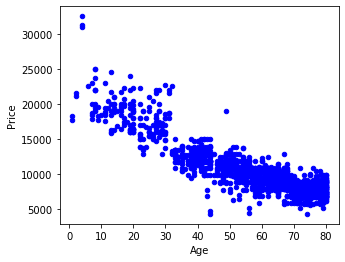

In [12]:
# Taling closer look at the Scatter plot between Price Vs Age
CarPricesData.plot.scatter(x='Age', y='Price', figsize=(5,4), marker='o', color='blue')

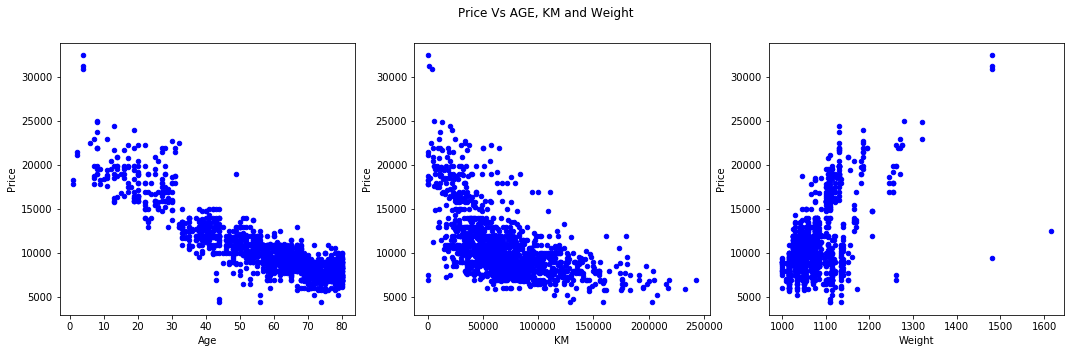

In [13]:
import matplotlib.pyplot as plt

# Generating multiple subplots
fig, subPlot=plt.subplots(nrows=1, ncols=3, figsize=(18,5))

# Creating the super title of the charts
fig.suptitle('Price Vs AGE, KM and Weight')

# Generating multiple scatter charts
CarPricesData.plot.scatter(x='Age', y='Price', marker='o', color='blue', ax=subPlot[0])
CarPricesData.plot.scatter(x='KM', y='Price', marker='o', color='blue', ax=subPlot[1])
CarPricesData.plot.scatter(x='Weight', y='Price', marker='o', color='blue', ax=subPlot[2])

#### Outlier Observation:
* There are few outliers in the data clearly visible for Price > 30,000
* This will bias the regression model, hence, if the number of records are less, it is advisable to remove these records or replace it with a logical value which is nearby to similar records according to the data

In [14]:
# Finding those rows where price column has outliers
CarPricesData[CarPricesData['Price']>30000]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
109,32500,4.0,1,Diesel,116,0,0,2000.0,5,1480.0
110,31000,4.0,4000,Diesel,116,1,0,2000.0,5,1480.0
111,31275,4.0,1500,Diesel,116,1,0,2000.0,5,1480.0


In [15]:
# Code to delete the outlier records from the data
#print('Shape before outlier removal', CarPricesData.shape)
#CarPricesData=CarPricesData[CarPricesData['Price']<30000]
#print('Shape after outlier removal', CarPricesData.shape)

In [16]:
# Code to replace the outlier values with a logical value
CarPricesData['Price'][CarPricesData['Price']>30000]=25000
CarPricesData['Price'].describe()

count     1435.000000
mean     10707.135192
std       3540.784461
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      25000.000000
Name: Price, dtype: float64

#### Scatter plot after Outlier treatment

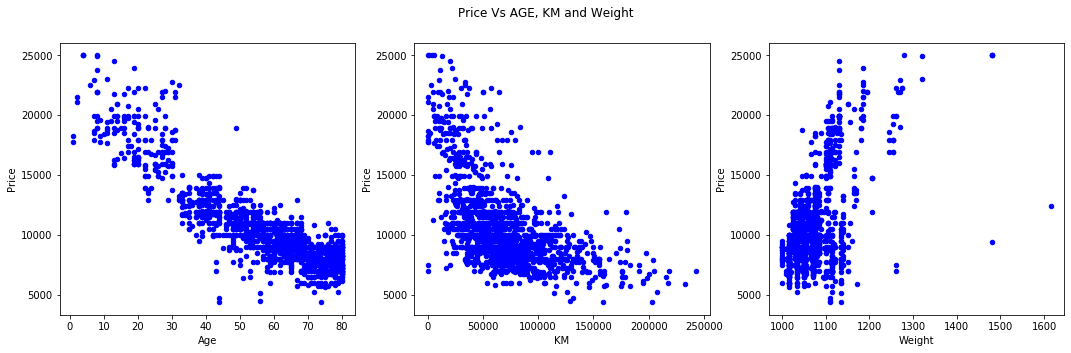

In [17]:
import matplotlib.pyplot as plt

# Generating multiple subplots
fig, subPlot=plt.subplots(nrows=1, ncols=3, figsize=(18,5))

# Creating the super title of the charts
fig.suptitle('Price Vs AGE, KM and Weight')

# Generating multiple scatter charts again after the outlier treatment
CarPricesData.plot.scatter(x='Age', y='Price', marker='o', color='blue', ax=subPlot[0])
CarPricesData.plot.scatter(x='KM', y='Price', marker='o', color='blue', ax=subPlot[1])
CarPricesData.plot.scatter(x='Weight', y='Price', marker='o', color='blue', ax=subPlot[2])

### Statistical Feature Selection (Continuous Vs Continuous) using Correlation Marix
Finding the top numeric continuous variables which correlate with the target variable

In [18]:
# Creating the correlation matrix
CorrelationData=CarPricesData.corr()
CorrelationData

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Price,1.000000,-0.881867,-0.573399,0.316391,0.110116,0.035525,0.153260,0.183173,0.556452
Age,-0.881867,1.000000,0.503485,-0.156209,-0.105895,0.030887,-0.130827,-0.147008,-0.465909
KM,-0.573399,0.503485,1.000000,-0.332904,-0.079864,-0.082168,0.305182,-0.035193,-0.024290
HP,0.316391,-0.156209,-0.332904,1.000000,0.058272,0.013313,0.048389,0.091803,0.087472
MetColor,0.110116,-0.105895,-0.079864,0.058272,1.000000,-0.019222,0.034512,0.084796,0.056026
Automatic,0.035525,0.030887,-0.082168,0.013313,-0.019222,1.000000,-0.069324,-0.027492,0.058379
CC,0.153260,-0.130827,0.305182,0.048389,0.034512,-0.069324,1.000000,0.126476,0.650142
Doors,0.183173,-0.147008,-0.035193,0.091803,0.084796,-0.027492,0.126476,1.000000,0.301438
Weight,0.556452,-0.465909,-0.024290,0.087472,0.056026,0.058379,0.650142,0.301438,1.000000


In [19]:
# Filtering only those columns where absolute correlation > 0.5 with Price
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

Price     1.000000
Age      -0.881867
KM       -0.573399
Weight    0.556452
Name: Price, dtype: float64

### Relationship exploration: Continuous Vs Categorical
When the target variable is continuous and the predictor variable is categorical we analyze the relation using bar plots and measure the strength of relation using Anova test

#### Visualizing the relation between Price and Fuel Type using bar chart
We Group by and keep categorical variable in the X-Axis and the continuous variable in the Y-Axis

In [20]:
# Grouping by Fuel type to find the aggregated values
GroupedData=CarPricesData.groupby(['FuelType'])

# Printing the aggregated values
#GroupedData.size()
#GroupedData.sum()
#GroupedData.count()
GroupedData.mean()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
FuelType,,,,,,,,,
CNG,9421.176471,56.352941,117865.588235,110.000000,0.764706,0.058824,1599.882353,4.117647,1097.823529
Diesel,11077.474026,51.000000,112618.649351,78.292208,0.655844,0.000000,1976.396104,4.097403,1157.350649
Petrol,10673.649206,56.629571,62554.623810,104.139683,0.675397,0.061905,1516.058824,4.025397,1061.539746


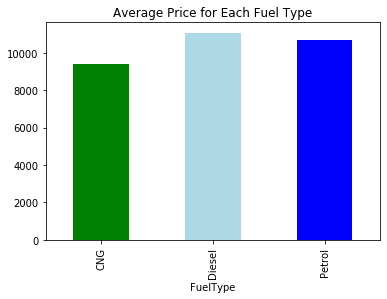

In [21]:
# Creating the graph with Price
GroupedData.mean()['Price'].plot(kind='bar', title='Average Price for Each Fuel Type', color=['green','lightblue','blue'])

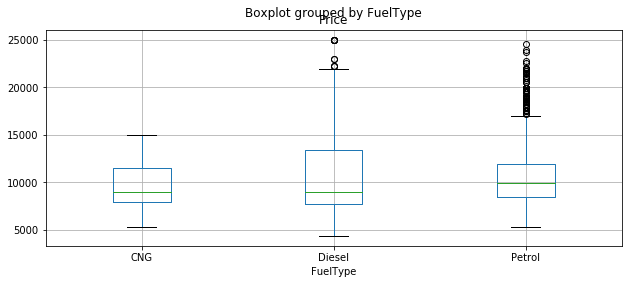

In [22]:
# Looking at the variances in Price by each fuel type in box plot
# IF the distribution of each type is similar, it gives a hint that there is no correlation
# Between the categorical and the numeric variable
CarPricesData.boxplot(column='Price', by='FuelType', figsize=(10,4))

### Statistical Feature Selection (Continuous Vs Categorical) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical predictor variable)
* ANOVA Test result: Probability of H0 being true

In [23]:
CarPricesData.groupby('FuelType')['Price'].apply(list)

FuelType
CNG       [7750, 11950, 11950, 14950, 12950, 8500, 9250,...
Diesel    [13500, 13750, 13950, 14950, 13750, 12950, 169...
Petrol    [21500, 20950, 19950, 19600, 21500, 22000, 227...
Name: Price, dtype: object

In [24]:
# f_oneway() function takes the group data as input and returns F-statistic and P-value
from scipy.stats import f_oneway


# Running the one-way anova test between Price and FuelTypes
# Assumption(H0) is that FuelType and Prices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=CarPricesData.groupby('FuelType')['Price'].apply(list)
# Performing the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)


# Extreme example when all values are same and the variables are not correlated
#AnovaResults = f_oneway( [10,20], [10,20], [10,20] )

# Extreme example when all the values are different and both variables has correlation
#AnovaResults = f_oneway( [400,500], [7,10], [0.006,0.00001] )

print('P-Value for Anova is: ', AnovaResults[1])

# We accept the Assumption(H0) only when P-Value > 0.05
# Here the P-Value is > 0.05 by a slight margin!! which means we will Accept the Assumption(H0)
# This means Price and Fuel Type are NOT correlated

P-Value for Anova is:  0.13135816358106872


In [25]:
# Home work
# Write a function to take 3 inputs and provide the anova results for all the categorical predictors
# FunctionAnova(inputData=CarPricesData, targetVar='Price', categoricalPredictors=['FuelType','MetColor'])

In [26]:
#1. Create a new jupyter notebook
#2. Type all the commands manually

#3. Perform data exploration for all the datasets in the Regression datasets folder

# Data Pre-processing for Machine Learning
* Treating Missing Values (Interpolate/Replace with median/Mode values)
* Treating Outliers (Delete or replace with nearby logical value)
* Converting each Ordinal Categorical columns to numeric
* Converting all nominal Categorical columns to numeric
* Standardization/Normalization(Optional)

### Data Pre-Processing: Treating Missing Values

In [27]:
# Finding out how many missing values are present in each column
CarPricesData.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

In [28]:
# Code to delete all the missing values at once
print('Before Deleting missing values:', CarPricesData.shape)
CarPricesDataCleaned=CarPricesData.dropna()
print('After Deleting missing values:', CarPricesDataCleaned.shape)

Before Deleting missing values: (1435, 10)
After Deleting missing values: (1425, 10)


### Example to show how interpolation works :)

In [29]:
import pandas as pd
import numpy as np
# How interpolate works?
s = pd.Series([0, 1, np.nan, 3, 4, 5, 6, np.nan, 8])

s = pd.Series([0, 5, np.nan, 4, 80, 14, 130, np.nan, 10])
s1 = pd.Series(['Petrol', 'Diesel', np.nan, 'Diesel', 'Petrol', 'CNG', 'CNG', np.nan, 'Petrol'])

# For categorical data method= 'pad', 'ffill' , 'bfill' etc is used
#s1.interpolate(method='ffill')

# For numeric data method= 'linear', 'quadratic' etc is used
s.interpolate(method='linear')

0      0.0
1      5.0
2      4.5
3      4.0
4     80.0
5     14.0
6    130.0
7     70.0
8     10.0
dtype: float64

### Treating the missing values of CarPricesData

In [30]:
# Treating missing values in each column

# Replacing by interpolation for a numeric variable
CarPricesData['Age']=CarPricesData['Age'].interpolate(method='linear')

# Replacing with median value a numeric variable
MedianWeight=CarPricesData['Weight'].median()
CarPricesData['Weight']=CarPricesData['Weight'].fillna(value=MedianWeight)

###################################################################################

# Replacing with interpolation for a categorical variable
CarPricesData['FuelType']=CarPricesData['FuelType'].interpolate(method='ffill')

# Replacing with mode value for a categorical variable
ModeCC=CarPricesData['CC'].mode()[0]
CarPricesData['CC']=CarPricesData['CC'].fillna(value=ModeCC)

In [31]:
# Every column must have Zero missing values before you proceed futher
CarPricesData.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

### Data Pre-Processing: Treating Outliers
* Outliers are treated by either deleting them or replacing the outlier values with a logical value as per business and similar data

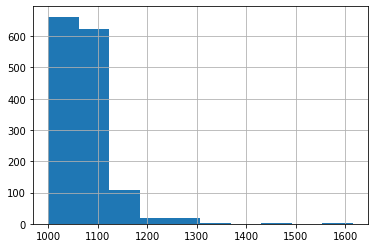

In [32]:
# Looking at the distribution of weight column
CarPricesData['Weight'].hist()

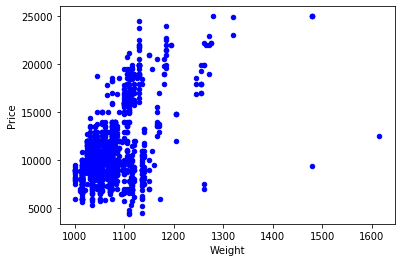

In [33]:
# Looking at the relation with the target column before removing outlier
CarPricesData.plot.scatter(x='Weight', y='Price', marker='o', color='blue')

In [34]:
# Looking at the correlation with target variable before removing outliers
CarPricesData[['Price','Weight']].corr()

,Price,Weight
Price,1.000000,0.556426
Weight,0.556426,1.000000


In [35]:
# Removing the outlier values from data
CarPricesData=CarPricesData[CarPricesData['Weight']<1400]

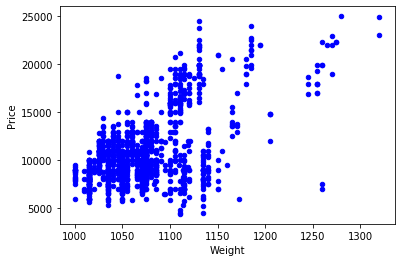

In [36]:
# Plotting again to see the effect of removing outliers
CarPricesData.plot.scatter(x='Weight', y='Price', marker='o', color='blue')

In [37]:
# Removing the outlier values from data
FilterCondition1=CarPricesData['Weight']>1250
FilterCondition2=CarPricesData['Price']<10000

# Printing the outlier rows
print(CarPricesData[FilterCondition1 & FilterCondition2])

RowsToDelete=CarPricesData[FilterCondition1 & FilterCondition2].index
CarPricesData=CarPricesData.drop(RowsToDelete)

     Price   Age      KM FuelType  HP  MetColor  Automatic      CC  Doors  \
601   7500  50.0       1   Diesel  90         1          0  2000.0      3   
654   6950  65.0  114383   Diesel  90         0          0  2000.0      3   

     Weight  
601  1260.0  
654  1260.0  


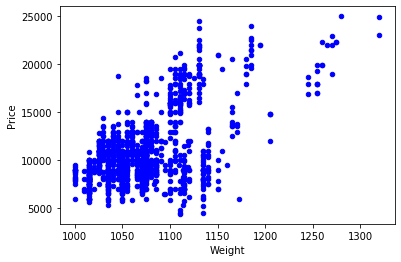

In [38]:
# Plotting again to see the effect of removing outliers
CarPricesData.plot.scatter(x='Weight', y='Price', marker='o', color='blue')

In [39]:
# Correlation increases after outlier removal in data
CarPricesData[['Price','Weight']].corr()

,Price,Weight
Price,1.000000,0.586109
Weight,0.586109,1.000000


### Data Pre-Processing: Converting Categorical data to numeric
1. First Treat all Ordinal variables by manually mapping the numeric values
2. Treat all nominal variables using dummy variables

In [40]:
# CarPricesData has only one string categorical variable FuelType
# Hence using get_dummies function
CarPricesDataNumeric=pd.get_dummies(CarPricesData)
CarPricesDataNumeric.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0


### Saving the processed data as pickle file

In [41]:
# Saving the pre-processed data for future reference
CarPricesDataNumeric.to_pickle('CarPricesDataNumeric.pkl')

In [42]:
CarPricesDataNumeric.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol'],
      dtype='object')

# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data

In [43]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Age']
X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1142, 1)
(1142,)
(286, 1)
(286,)


In [45]:
# Printing first 5 rows from training data
X_train[0:5]

array([[44.],
       [75.],
       [22.],
       [33.],
       [58.]])

# Machine Learning: Fitting Multiple algorithms on data
We create multiple models by using multiple algorithms and select that models which gives the best accuracy


## Simple Linear Regression
When only one predictor is used

In [46]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy on Test Data:',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Value: 0.774923202034439
Accuracy on Test Data: 88.63693816806311


,Age,Price,PredictedPrice
0,20.0,16500,16716.0
1,76.0,8950,7367.0
2,56.0,11950,10706.0
3,39.0,12695,13544.0
4,68.0,8900,8702.0


In [47]:
print('The value of slope is: ',LREG.coef_)
print('The value of Intercept is: ',LREG.intercept_)

The value of slope is:  [-166.94472579]
The value of Intercept is:  20054.44944297563


### Using above slope and intercept, Equation of our Simple Linear regression model becomes
<b> Price = -166.99 * Age + 20065.11 </b>

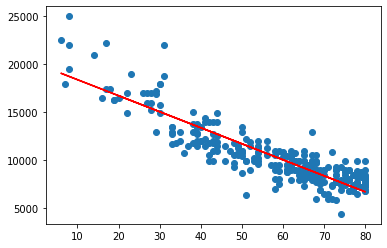

In [48]:
# Visualizing the line of best fit
import matplotlib.pyplot as plt
plt.scatter(x=TestingDataResults['Age'] , y=TestingDataResults['Price'])
plt.plot(TestingDataResults['Age'] , TestingDataResults['PredictedPrice'], color='red')

### Sampling with multiple Predictor columns for all other algorithms

In [49]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']
X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(999, 11)
(999,)
(429, 11)
(429,)


## Multiple Linear Regression
When multiple predictors are used

In [51]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy on Test Data:',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Value: 0.8862240338633861
Accuracy on Test Data: 90.94673214541355


,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice
0,20.0,35000.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,16500,16917.0
1,76.0,89520.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8950,7873.0
2,56.0,66777.0,110.0,0.0,0.0,1600.0,5.0,1090.0,0.0,0.0,1.0,11950,11406.0
3,39.0,24723.0,110.0,1.0,1.0,1600.0,4.0,1060.0,0.0,0.0,1.0,12695,13074.0
4,68.0,35000.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8900,9584.0


In [52]:
# Suppress the scientific notation in values
np.set_printoptions(suppress=True)

In [53]:
print('The value of slope is: ',LREG.coef_)
print('The value of Intercept is: ',LREG.intercept_)

The value of slope is:  [ -110.95542461    -0.01510892    30.88467686    50.76476514
   -38.20476579    -3.38138182  -200.19774171    35.53586194
 -1074.79688055   349.0194685    725.77741204]
The value of Intercept is:  -17817.510380067404


### Analyzing the errors and outliers in the data

In [54]:
TestingDataResults['APE']= np.abs((y_test - prediction) / y_test) * 100

# Printing the top 10 errors made by the model
TestingDataResults.sort_values(by='APE', ascending=False).head(10)

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice,APE
295,44.0,131273.0,69.0,1.0,0.0,1800.0,5.0,1110.0,0.0,1.0,0.0,4750,10205.0,114.846630
242,74.0,203254.0,72.0,1.0,0.0,2000.0,3.0,1135.0,0.0,1.0,0.0,4400,6494.0,47.594693
143,58.0,69022.0,86.0,1.0,0.0,1300.0,5.0,1035.0,0.0,0.0,1.0,6950,9520.0,36.973860
366,58.0,43000.0,110.0,1.0,1.0,1600.0,4.0,1114.0,1.0,0.0,0.0,7950,10808.0,35.954933
44,78.0,52287.0,110.0,0.0,0.0,1600.0,5.0,1114.0,0.0,0.0,1.0,7450,10037.0,34.722264
421,48.0,28656.0,97.0,0.0,0.0,1400.0,3.0,1085.0,0.0,0.0,1.0,9950,13367.0,34.343130
268,69.0,58952.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,6900,9112.0,32.051762
16,44.0,71793.0,110.0,1.0,0.0,1600.0,4.0,1067.0,1.0,0.0,0.0,14950,10295.0,31.138588
419,80.0,70939.0,110.0,1.0,1.0,1600.0,5.0,1100.0,0.0,0.0,1.0,6900,9048.0,31.132523
334,71.0,64000.0,110.0,1.0,0.0,1600.0,5.0,1070.0,0.0,0.0,1.0,6999,9124.0,30.357375


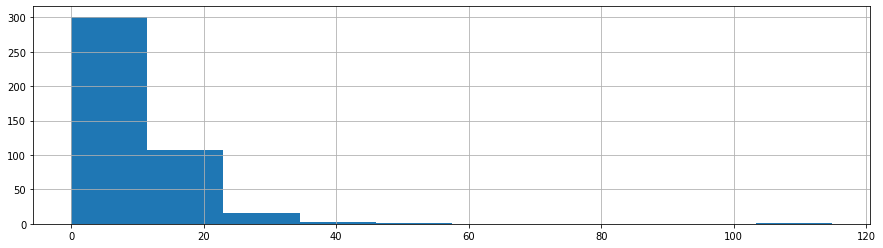

In [55]:
# Looking at the distribution of errors
TestingDataResults['APE'].hist(figsize=(15,4))

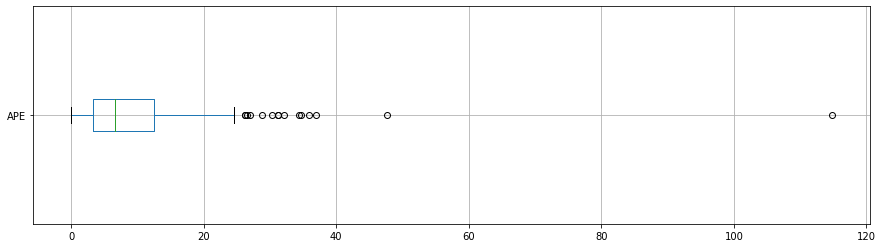

In [56]:
# Looking at the boxplot of APE to see the distribution of errors
TestingDataResults.boxplot(column='APE',figsize=(15,4), vert=False)

## Decision Tree

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
R2 Value: 0.6724301487627906
Accuracy 83.44308509234962


,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice
0,20.0,35000.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,16500,18033.0
1,76.0,89520.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8950,9584.0
2,56.0,66777.0,110.0,0.0,0.0,1600.0,5.0,1090.0,0.0,0.0,1.0,11950,9584.0
3,39.0,24723.0,110.0,1.0,1.0,1600.0,4.0,1060.0,0.0,0.0,1.0,12695,9584.0
4,68.0,35000.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8900,9584.0


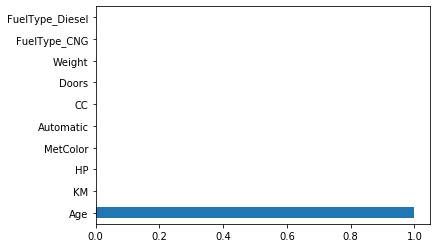

In [73]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=1,criterion='mse')

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

### Plotting a Decision Tree

In [74]:
# Variance number in the root node
np.var(y_train)

12486320.50942434

In [75]:
# Mean value number in the root node
np.mean(y_train)

10734.245245245245

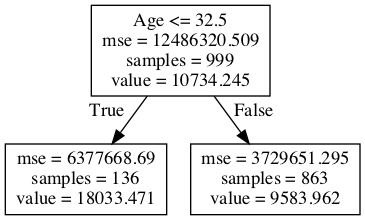

In [77]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

## Random Forest

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
R2 Value: 0.8232472436653424
Accuracy 88.87894566283816


,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice
0,20.0,35000.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,16500,16954.0
1,76.0,89520.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8950,8733.0
2,56.0,66777.0,110.0,0.0,0.0,1600.0,5.0,1090.0,0.0,0.0,1.0,11950,10090.0
3,39.0,24723.0,110.0,1.0,1.0,1600.0,4.0,1060.0,0.0,0.0,1.0,12695,11541.0
4,68.0,35000.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8900,8733.0


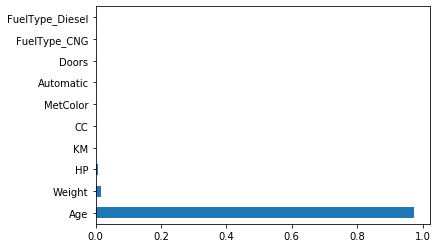

In [78]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=100,criterion='mse')

# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

### Plotting a single Decision tree out of Random Forest

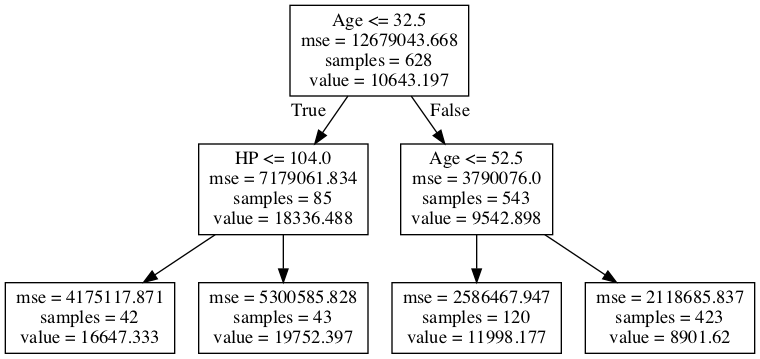

In [80]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[20] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

## AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=1,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.1, loss='linear', n_estimators=500,
                  random_

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice
0,20.0,35000.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,16500,18035.0
1,76.0,89520.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8950,9683.0
2,56.0,66777.0,110.0,0.0,0.0,1600.0,5.0,1090.0,0.0,0.0,1.0,11950,9683.0
3,39.0,24723.0,110.0,1.0,1.0,1600.0,4.0,1060.0,0.0,0.0,1.0,12695,10416.0
4,68.0,35000.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8900,9886.0


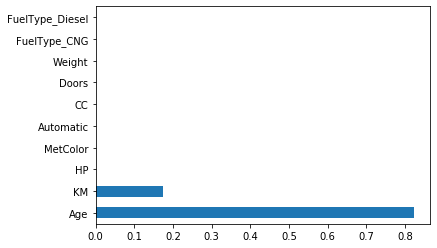

In [81]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=1)
RegModel = AdaBoostRegressor(n_estimators=500, base_estimator=DTR ,learning_rate=0.1)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

### Plotting a single Decision tree out of Adaboost

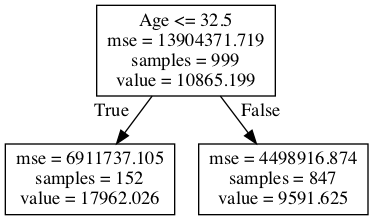

In [83]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 10th Decision Tree in AdaBoost
dot_data = tree.export_graphviz(RegModel.estimators_[8] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [ ]:
# install XGBoost library
# !pip install xgboost

In [ ]:
!pip install xgboost

## XGBoost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)
R2 Value: 0.9604767661810563
Accuracy 92.12177122642234


,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice
0,20.0,35000.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,16500,16441.0
1,76.0,89520.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8950,7960.0
2,56.0,66777.0,110.0,0.0,0.0,1600.0,5.0,1090.0,0.0,0.0,1.0,11950,11555.0
3,39.0,24723.0,110.0,1.0,1.0,1600.0,4.0,1060.0,0.0,0.0,1.0,12695,13595.0
4,68.0,35000.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8900,9924.0


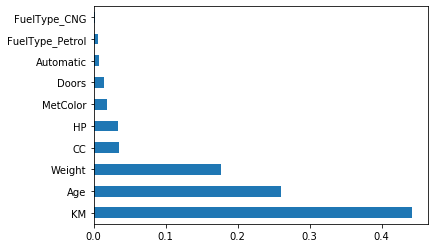

In [46]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=1000, objective='reg:linear', booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

### Plotting a single Decision tree out of XGBoost
XGboost is not yet implemented under graphviz, hence we use its own method to plot it

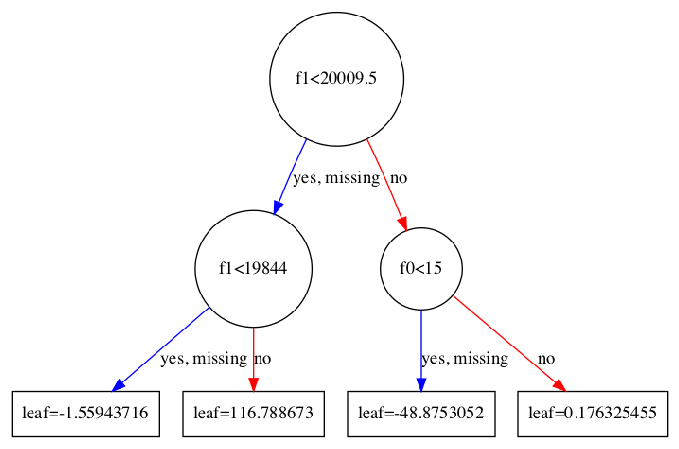

In [48]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=500, ax=ax)

## KNN

In [49]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=10)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')
R2 Value: 0.5661814416172923
Accuracy 81.14190304414777


,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice
0,20.0,35000.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,16500,13228.0
1,76.0,89520.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8950,9359.0
2,56.0,66777.0,110.0,0.0,0.0,1600.0,5.0,1090.0,0.0,0.0,1.0,11950,9625.0
3,39.0,24723.0,110.0,1.0,1.0,1600.0,4.0,1060.0,0.0,0.0,1.0,12695,15204.0
4,68.0,35000.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8900,13228.0
